# Decision Tree on Yearly Aggregates
<a id='top'></a>

<a href=#readdata>Read Data</a>  

<a href=#features>Feature Selection</a>

<a href=#dt>Decision Tree</a>

<a href=#feature_importance>Feature Importance</a>

<a href=#balancedata>Balance Data</a>

<a href=#dt_rebalance>Decision Tree on Re-Balance Data</a>

<a href=#plot>Plot ROC Curve</a>

<a href=#verify_unbalanced>Verify on Unbalanced Dataset</a>

<a href=#oversample>Oversample Minority Class</a>

<a href=#feature_importance_final>Feature Importance Final Model</a>

<a href=#lift_chart_final>Lift Chart</a>

<a href=#confusionmatrixplot>Confusion Matrix Plot</a>

<a href=#bottom>Bottom</a>


In [50]:
# Ignore 'dask' warning
import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
from datetime import date
import numpy as np

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.utils import resample
from sklearn import preprocessing
from scipy.stats import sem
import pickle

from matplotlib import pyplot
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import scikitplot as skplt
import itertools


<a id='readdata'></a>
# Read Yearly Aggregated Data 
<a href=#top>Top</a>

In [3]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)


In [4]:

# Post-aggregation
def create_dict_types_aggregated_data():
    # Setting up dictionary of column types for the aggregated dataset
    dtype={ 
        'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'has_relocated':bool,
        'has_relocated_next_year ' : bool,
        'has_name_change' : bool,
        'qty_address_mutations_total' :np.float64,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'code_legal_form_group_1':  np.int64,
        'code_legal_form_group_2':  np.int64,
        'SBI_group_1':  np.int64,
        'SBI_group_2':  np.int64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'SBI_has_changed' : bool,
        'unique_id' : object,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_employees'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64
      }
    return dtype

def create_dict_types_aggregated_data2017():
    dtype2017={ 
        'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'has_relocated_next_yearC' : bool,
        'has_name_change' : bool,
        'qty_address_mutations_total' :np.float64,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'code_legal_form_group_1':  np.int64,
        'code_legal_form_group_2':  np.int64,
        'SBI_group_1':  np.int64,
        'SBI_group_2':  np.int64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'SBI_has_changed' : bool,
        'unique_id' : object,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_employees'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64
      }
    return dtype2017

def create_parse_dates_list_aggregated_data():
    # Setting up dictionary of column types for the aggregated dataset
    parse_dates= ['date_month', 'years_in_current_location']
    return parse_dates

def create_basetable(year_list, dir_prefix = ''):
    """ Reads a whole year of data from the already aggregated files and creates basetable """
    dtype = create_dict_types_aggregated_data()
    dtype2017 = create_dict_types_aggregated_data2017()
    parse_dates = create_parse_dates_list_aggregated_data()
    basetable = pd.DataFrame()
    for year in year_list:
        full_year_df = pd.DataFrame()
        print('Starting with year: ', year)
        print(dir_prefix)
        blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
        for blob in blob_list:  
            if year in blob.name and year != '2017':
                print('Processing file: ', blob.name)
                with fs.open('graydon-data/' + blob.name) as f:
                    full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates 
                                            )   
                print('The number of rows of the year read is far is: ', full_year_df.shape[0])
            elif year in blob.name and year == '2017':
                print('Processing file: ', blob.name)
                with fs.open('graydon-data/' + blob.name) as f:
                    full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype2017, 
                                               parse_dates=parse_dates, )
                    full_year_df.rename(columns = {'has_relocated_next_yearC': 'has_relocated_next_year'}, inplace = True)
                print('The number of rows of the year read is far is: ', full_year_df.shape[0])
        basetable = basetable.append(full_year_df)
    print('The final number of rows of the basetable created is: ', basetable.shape[0])
    return basetable

# Calling it
data_df = create_basetable(year_list = ['2013', '2014', '2015', '2016', '2017'], dir_prefix ='03_aggregated')

Starting with year:  2013
03_aggregated
Processing file:  03_aggregated/2013_aggregated.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4,58) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows of the year read is far is:  1811253
Starting with year:  2014
03_aggregated
Processing file:  03_aggregated/2014_aggregated.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


The number of rows of the year read is far is:  1852836
Starting with year:  2015
03_aggregated
Processing file:  03_aggregated/2015_aggregated.csv
The number of rows of the year read is far is:  1890941
Starting with year:  2016
03_aggregated
Processing file:  03_aggregated/2016_aggregated.csv
The number of rows of the year read is far is:  1930102


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Starting with year:  2017
03_aggregated
Processing file:  03_aggregated/2017_aggregated.csv
The number of rows of the year read is far is:  1966208
The final number of rows of the basetable created is:  9451340


In [5]:
data_df.shape[0]

9451340

## Check Distribution of Target:
<a href=#top>Top</a>

In [6]:
print(data_df.has_relocated_next_year.value_counts(), '\n',
data_df.has_relocated_next_year.value_counts() / data_df.shape[0])

False    8582436
True      504073
Name: has_relocated_next_year, dtype: int64 
 False    0.908066
True     0.053333
Name: has_relocated_next_year, dtype: float64


In [7]:
sum(data_df.has_relocated_next_year.isna())

364831

In [8]:
data_df[data_df.has_relocated_next_year.isna()] = 0

In [9]:
sum(data_df.has_relocated_next_year.isna())

0

In [10]:
print(data_df.has_relocated_next_year.value_counts(), '\n',
data_df.has_relocated_next_year.value_counts() / data_df.shape[0])

False    8947267
True      504073
Name: has_relocated_next_year, dtype: int64 
 False    0.946667
True     0.053333
Name: has_relocated_next_year, dtype: float64


In [11]:
HTML(DataFrame(data_df).head(10).to_html())

,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,NR,SBI_group_1,SBI_group_2,SBI_has_changed,code_legal_form_group_1,code_legal_form_group_2,code_legal_form_has_changed,code_sbi_1,company_age,date_month,delta_qty_employees,delta_qty_issued_credit_reports,delta_score_payment_assessment,has_financial_calamity,has_name_change,has_relocated,has_relocated_next_year,id_branch,id_company,is_discontinued_any,mean_amt_consolidated_operating_result,mean_amt_consolidated_revenue,mean_amt_operating_result,mean_amt_revenue,mean_qty_employees,mean_qty_issued_credit_reports,mean_score_payment_assessment,mean_score_pd,qty_address_mutations_year,qty_board_changes_year,qty_green_flags,qty_orange_flags,qty_red_flags,qty_started_names_year,qty_stopped_names_year,ratio_operating_result_consolidated_operating_result,ratio_revenue_consolidated_revenue,unique_id,variance_qty_employees,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd,years_in_current_location,years_since_last_amt_consolidated_operating_result,years_since_last_amt_consolidated_revenue,years_since_last_amt_operating_result,years_since_last_amt_revenue,years_since_last_qty_employees
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,11,False,0,11,False,NaN,33.0,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,428134.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_428134.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,803351.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_803351.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,810695.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_810695.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,811258.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_811258.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,811333.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_811333.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,818258.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_818258.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,823722.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_823722.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,829630.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_829630.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,834432.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_834432.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,11,False,0,11,False,NaN,NaN,2013-01-01 00:00:00,NaN,0.0,0.0,False,False,False,False,0,834909.0,False,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN,0_834909.0,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN


In [13]:
data_df.shape

(9451340, 58)

<a id='features'></a>
# Feature Selection:

<a href=#top>Top</a>

In [14]:
print(data_df.isnull().sum())

A                                                             0
AA                                                            0
AAA                                                           0
B                                                             0
BB                                                            0
BBB                                                           0
C                                                             0
CC                                                            0
CCC                                                           0
D                                                             0
NR                                                            0
SBI_group_1                                                   0
SBI_group_2                                                   0
SBI_has_changed                                               0
code_legal_form_group_1                                       0
code_legal_form_group_2                 

In [15]:
features_to_exclude = ('id_branch',
                       'id_company',
                       'date_month',
                       'unique_id',
                       'code_sbi_1',
                       'has_relocated',
                       'has_relocated_next_year_',
                       #'has_name_change',
                       'delta_qty_employees',
                       #'delta_qty_issued_credit_reports', 
                       #'delta_score_payment_assessment',
                       #'code_legal_form_has_changed',
                       #'SBI_has_changed',
                       #'company_age',
                       'years_since_last_amt_consolidated_operating_result',
                       'years_since_last_amt_consolidated_revenue',
                       'years_since_last_amt_operating_result',
                       'years_since_last_qty_employees',
                       'years_since_last_amt_revenue',
                       'years_in_current_location',
                       'ratio_operating_result_consolidated_operating_result',
                       'ratio_revenue_consolidated_revenue',
                       #'qty_green_flags',
                       #'qty_orange_flags',
                       #'qty_red_flags',
                       #'A',
                       #'AA',
                       #'AAA',
                       #'B',
                       #'BB',
                       #'BBB',
                       #'C',
                       #'CC',
                       #'CCC',
                       #'D',
                       #'NR',
                       #'code_legal_form_group_1',
                       #'code_legal_form_group_2',
                       #'SBI_group_1',
                       #'SBI_group_2',
                       #'is_discontinued_any',
                       #'has_financial_calamity',
                       'mean_amt_consolidated_operating_result',
                       'mean_amt_consolidated_revenue',
                       'mean_amt_operating_result',
                       'mean_amt_revenue',
                       'mean_qty_employees',
                       #'mean_qty_issued_credit_reports',
                       #'mean_score_payment_assessment',
                       'mean_score_pd',
                       #'qty_address_mutations_year',
                       #'qty_started_names_year',
                       #'qty_stopped_names_year',
                       #'qty_board_changes_year',
                       'variance_qty_employees',
                       #'variance_qty_issued_credit_reports',
                       #'variance_score_payment_assessment',
                       'variance_score_pd',
                       'has_relocated_next_year'
                      )

features_in_model = [feature for feature in data_df.columns.tolist() 
                     if feature not in features_to_exclude]


In [12]:
features_in_model

['A',
 'AA',
 'AAA',
 'B',
 'BB',
 'BBB',
 'C',
 'CC',
 'CCC',
 'D',
 'NR',
 'SBI_group_1',
 'SBI_group_2',
 'SBI_has_changed',
 'code_legal_form_group_1',
 'code_legal_form_group_2',
 'code_legal_form_has_changed',
 'company_age',
 'delta_qty_issued_credit_reports',
 'delta_score_payment_assessment',
 'has_financial_calamity',
 'has_name_change',
 'is_discontinued_any',
 'mean_qty_issued_credit_reports',
 'mean_score_payment_assessment',
 'qty_address_mutations_year',
 'qty_board_changes_year',
 'qty_green_flags',
 'qty_orange_flags',
 'qty_red_flags',
 'qty_started_names_year',
 'qty_stopped_names_year',
 'variance_qty_issued_credit_reports',
 'variance_score_payment_assessment']

In [16]:
data_to_model = data_df[features_in_model + ['has_relocated_next_year']]

In [17]:
data_to_model.shape

(9451340, 35)

## Check for NAs

Drop rows with NA:

For other options: https://machinelearningmastery.com/handle-missing-data-python/

In [15]:
data_to_model.isnull().values.any()

True

In [17]:
print(data_to_model.isnull().sum())

A                                          0
AA                                         0
AAA                                        0
B                                          0
BB                                         0
BBB                                        0
C                                          0
CC                                         0
CCC                                        0
D                                          0
NR                                         0
SBI_group_1                                0
SBI_group_2                                0
SBI_has_changed                            0
code_legal_form_group_1                    0
code_legal_form_group_2                    0
code_legal_form_has_changed                0
company_age                           141194
delta_qty_issued_credit_reports            0
delta_score_payment_assessment             0
has_financial_calamity                     0
has_name_change                            0
is_discont

Drop rows with NA:

In [18]:
data_to_model.dropna(inplace=True)

# summarize the number of rows and columns in the dataset
print(data_to_model.shape)

(9264754, 35)


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_to_model.isnull().values.any()

False

<a id='dt'></a>
# Decision Tree:

<a href=#top>Top</a>

### Create Test/Train sets

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data_to_model[features_in_model], data_to_model.has_relocated_next_year, 
                                                    test_size=0.20, random_state=0)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [21]:
print(y_train.value_counts(), '\n', y_train.value_counts() / y_train.shape[0])

0    7012941
1     398862
Name: has_relocated_next_year, dtype: int64 
 0    0.946186
1    0.053814
Name: has_relocated_next_year, dtype: float64


In [20]:
clf0 = tree.DecisionTreeClassifier()
clf0.fit(x_train, y_train)  


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(x_train,y_train,clf0, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.964 



## Save Model:

<a href=#top>Top</a>

In [22]:
filename = 'models/DT_2013_2017defaults_unbalanced.sav'
pickle.dump(clf0, open(filename, 'wb'))

In [26]:
print(clf0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [27]:
clf0_reread = pickle.load(open(filename, 'rb'))
print(clf0_reread)

# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [28]:
measure_performance(x_train,y_train,clf0_reread, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.964 



## Paramater Tuning:

In [21]:
GridSearchCV?

In [39]:
parameters = {'max_depth':range(3,20), 'min_samples_split':range(5, 20)}
clf00 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf00.fit(X=x_train, y=y_train)
clf0 = clf00.best_estimator_
print (clf00.best_score_, clf00.best_params_)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [92]:
measure_performance(x_train,y_train,clf0, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.952 



In [150]:
clf0

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_pred=clf0.predict(x_test)

In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1715912,   37027],
       [  95633,    4379]])

In [25]:
print('Accuracy of Decision Tree classifier on test set: {:.4f}'.format(clf0.score(x_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.9284


In [26]:
y_test.value_counts() / y_test.shape[0]

0    0.946026
1    0.053974
Name: has_relocated_next_year, dtype: float64

In [27]:
score=metrics.accuracy_score(y_test, y_pred)

# Get probabilities
y_probs = clf0.predict_proba(x_test)

# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

auc = metrics.roc_auc_score(y_test, y_probs)

kappa = metrics.cohen_kappa_score(y_test, y_pred)
cr=metrics.classification_report(y_test, y_pred)

In [28]:
score, auc, kappa

(0.928406093847058, 0.5799789492325091, 0.03131305269253015)

In [29]:
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96   1752939
           1       0.11      0.04      0.06    100012

   micro avg       0.93      0.93      0.93   1852951
   macro avg       0.53      0.51      0.51   1852951
weighted avg       0.90      0.93      0.91   1852951



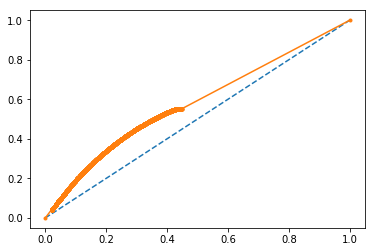

In [30]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test, y_probs)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr0, tpr0, marker='.')
# show the plot
pyplot.show()

<a id='feature_importance'></a>
# Feature Importance
<a href=#top>Top</a>

In [31]:
importances = clf0.feature_importances_

In [32]:
len(importances)

34

NameError: name 'plt' is not defined

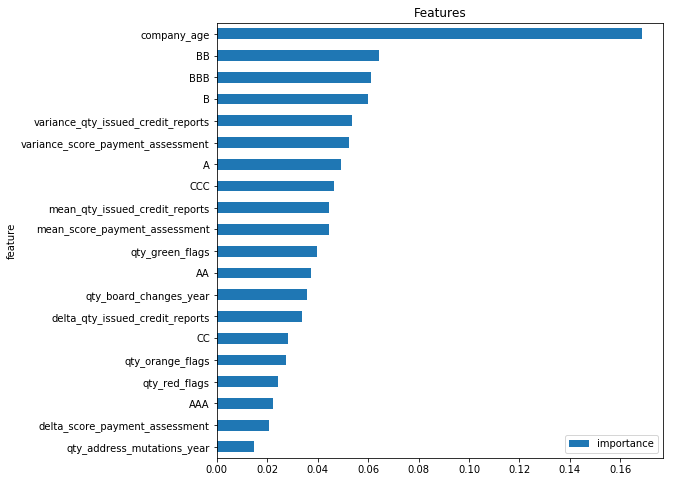

In [33]:
feat_imp = pd.DataFrame({'importance':clf0.feature_importances_})    
feat_imp['feature'] = x_train[features_in_model].columns

feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:20]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Features', figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

<a id='balancedata'></a>
## Balance Data:

<a href=#top>Top</a>

In [22]:
train_all = x_train.copy()

In [23]:
train_all.columns

Index(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'C', 'CC', 'CCC', 'D', 'NR',
       'SBI_group_1', 'SBI_group_2', 'SBI_has_changed',
       'code_legal_form_group_1', 'code_legal_form_group_2',
       'code_legal_form_has_changed', 'company_age',
       'delta_qty_issued_credit_reports', 'delta_score_payment_assessment',
       'has_financial_calamity', 'has_name_change', 'is_discontinued_any',
       'mean_qty_issued_credit_reports', 'mean_score_payment_assessment',
       'qty_address_mutations_year', 'qty_board_changes_year',
       'qty_green_flags', 'qty_orange_flags', 'qty_red_flags',
       'qty_started_names_year', 'qty_stopped_names_year',
       'variance_qty_issued_credit_reports',
       'variance_score_payment_assessment'],
      dtype='object')

In [24]:
train_all['has_relocated_next_year'] = y_train

In [25]:
train_all.shape

(7411803, 35)

In [26]:
train_all.has_relocated_next_year.value_counts() / train_all.shape[0]

0    0.946186
1    0.053814
Name: has_relocated_next_year, dtype: float64

In [27]:
# Choose desired class breakdown
fraction_majority = 0.50

In [28]:
num_minority = train_all[train_all['has_relocated_next_year']==True].shape[0]

num_majority = fraction_majority * num_minority / (1 - fraction_majority)

num_minority, int(num_majority), num_majority, num_majority/(num_majority + num_minority)

(398862, 398862, 398862.0, 0.5)

In [29]:
# Separate majority and minority classes
df_majority = train_all[train_all.has_relocated_next_year==False]
df_minority = train_all[train_all.has_relocated_next_year==True]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=int(num_majority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.has_relocated_next_year.value_counts()

1    398862
0    398862
Name: has_relocated_next_year, dtype: int64

In [30]:
df_downsampled.has_relocated_next_year.value_counts()/df_downsampled.shape[0]

1    0.5
0    0.5
Name: has_relocated_next_year, dtype: float64

In [31]:
df_downsampled.shape

(797724, 35)

## Remove NaNs from Balanced Dataset:

In [32]:
data_to_model = df_downsampled[features_in_model + ['has_relocated_next_year']]

In [33]:
data_to_model.shape

(797724, 35)

In [34]:
data_to_model.columns

Index(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'C', 'CC', 'CCC', 'D', 'NR',
       'SBI_group_1', 'SBI_group_2', 'SBI_has_changed',
       'code_legal_form_group_1', 'code_legal_form_group_2',
       'code_legal_form_has_changed', 'company_age',
       'delta_qty_issued_credit_reports', 'delta_score_payment_assessment',
       'has_financial_calamity', 'has_name_change', 'is_discontinued_any',
       'mean_qty_issued_credit_reports', 'mean_score_payment_assessment',
       'qty_address_mutations_year', 'qty_board_changes_year',
       'qty_green_flags', 'qty_orange_flags', 'qty_red_flags',
       'qty_started_names_year', 'qty_stopped_names_year',
       'variance_qty_issued_credit_reports',
       'variance_score_payment_assessment', 'has_relocated_next_year'],
      dtype='object')

## Check for NAs

Drop rows with NA:

For other options: https://machinelearningmastery.com/handle-missing-data-python/

In [35]:
data_to_model.isnull().values.any()

False

In [35]:
print(data_to_model.isnull().sum())

has_name_change                       0
delta_qty_issued_credit_reports       0
delta_score_payment_assessment        0
code_legal_form_has_changed           0
SBI_has_changed                       0
company_age                           0
qty_green_flags                       0
qty_orange_flags                      0
qty_red_flags                         0
A                                     0
AA                                    0
AAA                                   0
B                                     0
BB                                    0
BBB                                   0
C                                     0
CC                                    0
CCC                                   0
D                                     0
NR                                    0
code_legal_form_group_1               0
code_legal_form_group_2               0
SBI_group_1                           0
SBI_group_2                           0
is_discontinued_any                   0


Drop rows with NA:

In [36]:
data_to_model.dropna(inplace=True)

# summarize the number of rows and columns in the dataset
print(data_to_model.shape)

(797724, 35)


In [37]:
data_to_model.isnull().values.any()

False

<a id='dt_rebalance'></a>

# Decision Tree on Re-balanced data

<a href=#top>Top</a>

In [48]:
x_re_train, x_re_test, y_re_train, y_re_test = train_test_split(data_to_model[features_in_model], 
                                                                data_to_model.has_relocated_next_year, 
                                                    test_size=0.25, random_state=0)

y_re_train=y_re_train.astype('int')
y_re_test=y_re_test.astype('int')

In [49]:
x_re_train.shape

(598293, 34)

In [50]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_re_train, y_re_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
# Default DT accuracy:
measure_performance(x_re_train,y_re_train,clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.840 



## Write out model:

In [52]:
filename = 'models/DT_2013_2017defaults_balanced.sav'
pickle.dump(clf, open(filename, 'wb'))

## Tuning:

In [55]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
# Grid searched DT accuracy:
measure_performance(x_re_test,y_re_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.592 



In [57]:
tree.DecisionTreeClassifier?

In [54]:
from sklearn.metrics import cohen_kappa_score, make_scorer

kappa_scorer = make_scorer(cohen_kappa_score)

#parameters = {'max_depth':[5, 10, 15], 'min_samples_split':[5,10], 'min_samples_leaf':[2,3,5]}
parameters = {'max_depth':[5, 10, 15], 
              'min_samples_split':[5,10,15], 
              'min_samples_leaf':[2,5, 8],
              'max_features': [10, 15, 20, 25, None]}
clfKappa = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, scoring=kappa_scorer)
clfKappa.fit(X=x_re_train, y=y_re_train)
clfDT_Kappa = clfKappa.best_estimator_
print (clfKappa.best_score_, clfKappa.best_params_)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.2649474110811978 {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'max_features': 25}


In [55]:
filename = 'models/DT_2013_2017md10_mss5_msl2_mf25_balanced.sav'
pickle.dump(clfDT_Kappa, open(filename, 'wb'))

In [57]:
# Grid searched DT accuracy:
measure_performance(x_re_train,y_re_train, clfDT_Kappa, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.635 



## Accuracy on Test Set:

<a href=#top>Top</a>

In [58]:
y_re_pred=clfDT_Kappa.predict(x_re_test)

In [60]:
cnf_matrix = metrics.confusion_matrix(y_re_test, y_re_pred)
cnf_matrix

array([[50430, 49288],
       [24219, 75494]])

In [61]:
score=metrics.accuracy_score(y_re_test, y_re_pred)

# Get probabilities
y_re_probs = clfDT_Kappa.predict_proba(x_re_test)

# keep probabilities for the positive outcome only
y_re_probs = y_re_probs[:, 1]

auc = metrics.roc_auc_score(y_re_test, y_re_probs)

kappa = metrics.cohen_kappa_score(y_re_test, y_re_pred)
cr=metrics.classification_report(y_re_test, y_re_pred)

In [62]:
score, auc, kappa

(0.6314163795999619, 0.6877474884940075, 0.2628374051191461)

In [64]:
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.51      0.58     99718
           1       0.61      0.76      0.67     99713

   micro avg       0.63      0.63      0.63    199431
   macro avg       0.64      0.63      0.63    199431
weighted avg       0.64      0.63      0.63    199431



<a id='plot'></a>
# Plot

<a href=#top>Top</a>


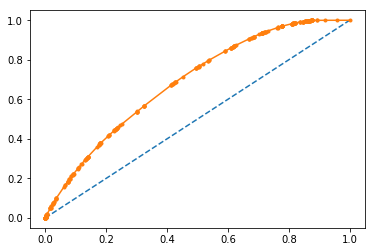

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_re_test, y_re_probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

<a id='verify_unbalanced'></a>
## Verify on Un-balanced test set:

<a href=#top>Top</a>

In [66]:
x_test.shape

(1852951, 34)

In [67]:
y_re_pred_unbalance=clfDT_Kappa.predict(x_test)

In [68]:
y_re_pred_unbalance.shape

(1852951,)

In [69]:
sum(y_test) / len(y_test), sum(y_test==0) / len(y_test) 

(0.053974444008503195, 0.9460255559914968)

In [70]:
sum(y_re_pred_unbalance==1) / len(y_re_pred_unbalance), sum(y_re_pred_unbalance!=1) / len(y_re_pred_unbalance)

(0.5087889534045963, 0.49121104659540377)

In [71]:
cnf_matrix = metrics.confusion_matrix(y_test, y_re_pred_unbalance)
cnf_matrix

array([[886253, 866686],
       [ 23937,  76075]])

In [72]:
score=metrics.accuracy_score(y_test, y_re_pred_unbalance)

# Get probabilities
y_re_probs = clfDT_Kappa.predict_proba(x_test)

# keep probabilities for the positive outcome only
y_re_probs = y_re_probs[:, 1]

auc = metrics.roc_auc_score(y_test, y_re_probs)

kappa = metrics.cohen_kappa_score(y_test, y_re_pred_unbalance)
cr=metrics.classification_report(y_test, y_re_pred_unbalance)

In [73]:
score, auc, kappa

(0.5193488656742677, 0.6891690638324834, 0.053538616211326495)

In [74]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.51      0.67   1752939
           1       0.08      0.76      0.15    100012

   micro avg       0.52      0.52      0.52   1852951
   macro avg       0.53      0.63      0.41   1852951
weighted avg       0.93      0.52      0.64   1852951



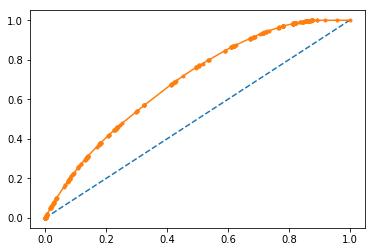

In [75]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_re_probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

<a id='oversample'></a>
## Oversample
<a href=#top>Top</a>

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
#[(0, 4674), (1, 4674), (2, 4674)]


In [ ]:
>>> clf_smote = LinearSVC().fit(X_resampled, y_resampled)
>>> X_resampled, y_resampled = ADASYN().fit_resample(X, y)
>>> print(sorted(Counter(y_resampled).items()))
[(0, 4673), (1, 4662), (2, 4674)]
>>> clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

<a href=#top>Top</a>
# Feature Importance of Final Model:
<a id='feature_importance_final'></a>

In [76]:
importances = clfDT_Kappa.feature_importances_

In [77]:
len(importances)

34

NameError: name 'plt' is not defined

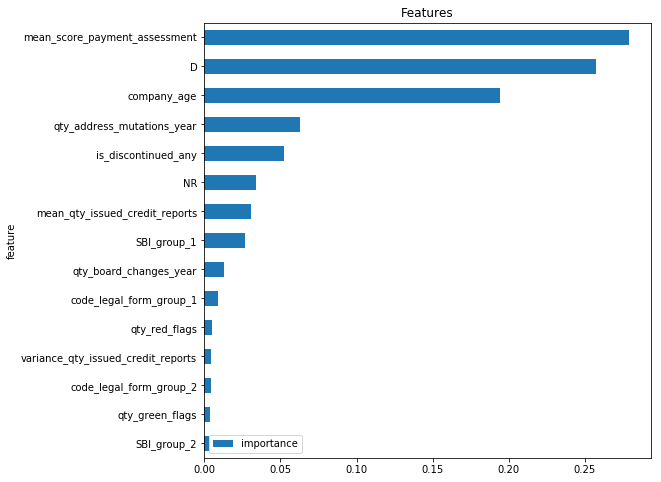

In [78]:
feat_imp = pd.DataFrame({'importance':importances})    
feat_imp['feature'] = x_train[features_in_model].columns

feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:15]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Features', figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

<a id='lift_chart_final'></a>
# Lift Chart  of Final Model:
<a href=#top>Top</a>

In [42]:
x_re_train, x_re_test, y_re_train, y_re_test = train_test_split(data_to_model[features_in_model], 
                                                                data_to_model.has_relocated_next_year, 
                                                    test_size=0.25, random_state=0)

In [39]:
filename = 'models/DT_2013_2017md10_mss5_msl2_mf25_balanced.sav'
model = pickle.load(open(filename, "rb"))

In [43]:
y_probs = model.predict_proba(x_re_test)


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


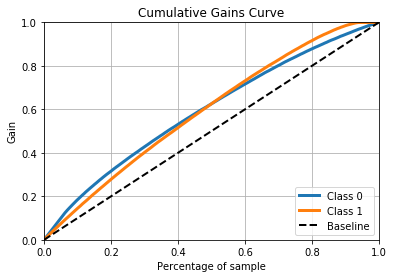

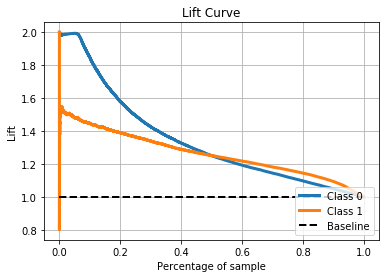

In [44]:
skplt.metrics.plot_cumulative_gain(y_re_test, y_probs)
plt.show()
skplt.metrics.plot_lift_curve(y_re_test, y_probs)
plt.show()

<a id='confusionmatrixplot'></a>
# Confusion Matrix Plot:
<a href=#top>Top</a>

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [48]:
y_re_pred= model.predict(x_re_test)
cnf_matrix = metrics.confusion_matrix(y_re_test, y_re_pred)
cnf_matrix

array([[50430, 49288],
       [24219, 75494]])

Confusion matrix, without normalization
[[50430 49288]
 [24219 75494]]


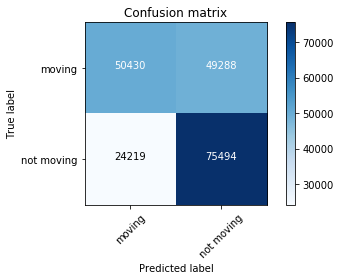

In [52]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['moving', 'not moving'],
                      title='Confusion matrix')

<a id='bottom'></a>

<a href=#top>Top</a>
# End